# Analyse Multivariée

## Résumé :
- 28% des femmes résilient contre 15.9% pour les hommes.
- L'age moyen homme/femme qui résilient est le même
- L'ancienneté ne semble pas corrélé avec le fait qu'un client résili.
- Les clients possédant 1 produit ont tendance à plus résilié
- Les clients avec 3 et 4 produits résilient majoritairement
- Les clients avec 2 produits sont les plus fidèles
- L'allamagne semble avoir le plus haut taux de résiliation comparer à la France et l'espagne
- Les clients inactifs ont plus tendance à résilier
- Le Score de crédit n'influence pas les clients à résilier
- Une balance de compte élevé à tendance à faire résilier les clients
- Le salaire estimé ne semble pas corrélérer avec la résiliation
- Les clients de plus de 44 ans ont plus tendance à résilier
- Les allemands n'ont que 0.32% de comptes à 0€ comparé à la France (69.19%) et L'Espagne (67%) dans ce jeu de donnée.
-L'âge n'est pas corrélé à l'ancienneté (Tenure) dans ce dataset.
- L'allemagne semble avoir plus de membre inactif que la France et l'Espagne
- France 50.4% de client actif
- Allemagne 46% de client actif
- Espagne 51.1% de client actif
- Les clients allemands ayant 1 produit sont plus nombreux qu'en France et Espagne
- Le nombre de clients possédant 1 ou 2 produits est équitable entre la France et l'Espagne
- Se sont les clients Allemands qui ont le plus 3 et 4 produits aussi
- Les clients allemands ont une médiane de 39 ans
- Les clients Français et Espagnol ont une médiane de 37 ans
- L'age mini pour l'Allemagne, la France et l'Espagne est de 18 ans
- L'age maxi pour l'allemagne est de 83 ans
- l'age maxi pour la France et l'Espagne est de 92 ans
- Il est interressant de noté que les clients allemands les plus agés ont 9 ans de moins que ceux de l'Espagne et la France<br> mais que la moyenne d'age des clients est d'environ 2 ans plus élevé que les clients Français et Espagnol 
- Le solde moyen des clients allemands est de 121 234 € avec une médiane à 122 021 €
- Le solde moyen des clients Français est de 37 376 € avec une médiane à 0 €
- Le solde moyen des clients Espagnols est de 39 986 € avec une médiane à 0 €
- Il y a autant de compte actif que inactif pour les clients ayant un solde égal ou supérieur à 0€
- Les comptes actifs avec un solde supérieur à 0€ ont plus tendances à résilier que ceux ayant un solde égal à 0€
- Les hommes et les femmes ont le même age moyen à 1 an prêt.

Parmi les femmes :
- 49,1 % ont 1 produit
- 48,3 % ont 2 produits
- 2,2 % ont 3 produits
- 0,4 % ont 4 produits

Parmi les hommes :
- 45,2 % ont 1 produit
- 53,2 % ont 2 produits
- 1,4 % ont 3 produits
- 0,2 % ont 4 produits

Hypothèses à tester :

- Les femmes sont plus nombreuses à résilier que les hommes
- Les clients ayant 1 produit sont plus nombreuses à résilier que ceux en ayant 2
- Pour un solde > 0, Les clients allemands sont plus nombreux à résilier que les clients Français et Espagnol
- Les clients actifs sont plus nombreux à résilier que les clients inactif
- Les clients ayant un solde élevée sont plus nombreux à résilier (Attention avec médiane à 0 FR et ES)
- Les clients de 44 ans et plus sont plus nombreux à résilier



# Début de l'analyse multivarié

### Import des packages

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import du jeu de données d'entraînement

In [5]:
df_train = pd.read_csv("train_data.csv")
df_train

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143574,97639,15759915,Onwumelu,559,Germany,Male,45.0,3,111634.29,1,1.0,1.0,103349.74,0
143575,95939,15769974,Shih,597,Germany,Male,41.0,10,119182.73,1,0.0,0.0,121299.14,0
143576,152315,15592028,Hsiao,576,Spain,Male,31.0,6,127299.56,1,1.0,1.0,57569.89,0
143577,117952,15804009,Ch'ang,751,France,Female,27.0,4,90721.11,1,0.0,0.0,84496.78,0


Hypothèses :
- 

1) Détection des variables discrètes et continu
2) Analyse univarié
3) Analyse multivarié
4) Faire des hypothèses et les testées

- Variables discrètes : Gender, Tenure, NumOfProducts, Geography, HasCrCard, IsActiveMember, Exited
- Variables continues : CreditScore, Balance, EstimatedSalary, Age

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143579 entries, 0 to 143578
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               143579 non-null  int64  
 1   CustomerId       143579 non-null  int64  
 2   Surname          143579 non-null  object 
 3   CreditScore      143579 non-null  int64  
 4   Geography        143579 non-null  object 
 5   Gender           143579 non-null  object 
 6   Age              143579 non-null  float64
 7   Tenure           143579 non-null  int64  
 8   Balance          143579 non-null  float64
 9   NumOfProducts    143579 non-null  int64  
 10  HasCrCard        143579 non-null  float64
 11  IsActiveMember   143579 non-null  float64
 12  EstimatedSalary  143579 non-null  float64
 13  Exited           143579 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 15.3+ MB


In [41]:
df_train.nunique().sort_values()


Gender                  2
Exited                  2
HasCrCard               2
IsActiveMember          2
Geography               3
NumOfProducts           4
Tenure                 11
Age                    71
CreditScore           456
Surname              2765
CustomerId          22017
Balance             27258
EstimatedSalary     50076
ID                 143579
dtype: int64

discrète - discrète

## Analyse de la variable "Gender" avec "Exited"

- 28% des femmes résilient contre 15.9% pour les hommes.
- L'age moyen homme/femme qui résilient est le même

In [6]:
pd.crosstab(df_train["Exited"], df_train["Gender"], normalize='columns')

Gender,Female,Male
Exited,,
0,0.719307,0.840983
1,0.280693,0.159017


Text(0.5, 0.98, 'Répartition des hommes et des femmes ayant résilié 1=oui, 0=non dans ce jeu de donnée')

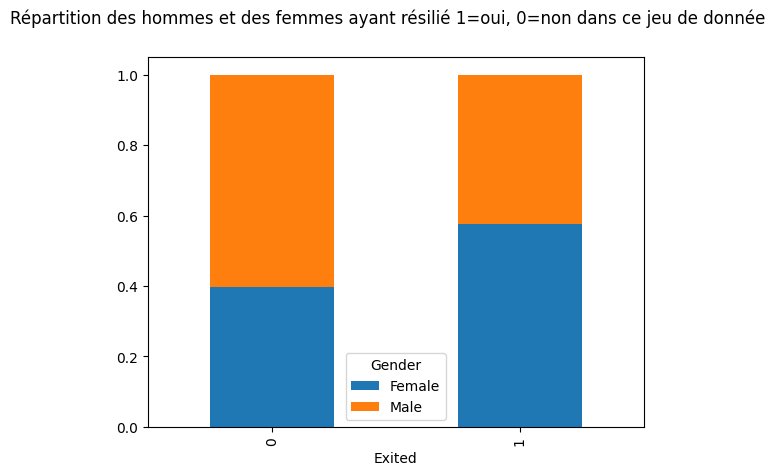

In [6]:
pd.crosstab(df_train["Exited"], df_train["Gender"], normalize="index").plot(kind="bar", stacked=True)
plt.suptitle("Répartition des hommes et des femmes ayant résilié 1=oui, 0=non dans ce jeu de donnée")

In [11]:
df_train.query("Gender == 'Female'").groupby("Exited")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,45038.0,36.713227,8.318211,18.0,31.0,36.0,40.0,92.0
1,17575.0,44.115220,8.927676,18.0,38.0,44.0,50.0,83.0


<Axes: xlabel='Exited'>

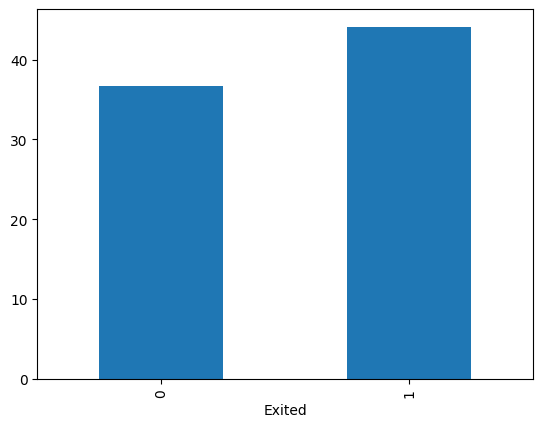

In [10]:
df_train.query("Gender == 'Female'").groupby("Exited")["Age"].mean().plot(kind="bar")

In [13]:
df_train.query("Gender == 'Male'").groupby("Exited")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,68091.0,36.498134,8.063903,18.0,31.0,36.0,40.0,92.0
1,12875.0,43.707650,9.049128,18.0,38.0,44.0,50.0,92.0


<Axes: xlabel='Exited'>

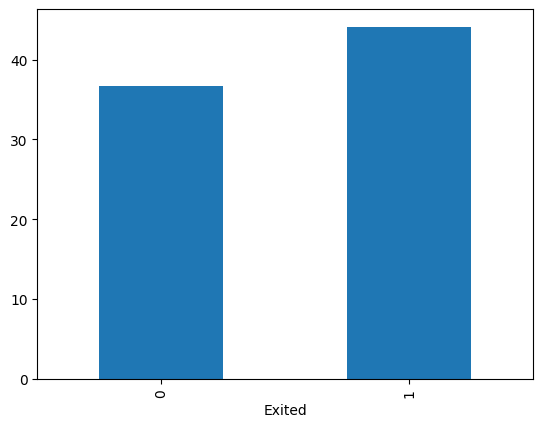

In [14]:
df_train.query("Gender == 'Female'").groupby("Exited")["Age"].mean().plot(kind="bar")

## Analyse de la variable "Tenure" avec "Exited"

- L'ancienneté ne semble pas corrélé avec le fait qu'un client résili.

In [30]:
pd.crosstab(df_train["Exited"], df_train["Tenure"], normalize=True)

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,0.022524,0.078570,0.088397,0.077804,0.082094,0.081384,0.076683,0.087478,0.085117,0.079858,0.028012
1,0.007745,0.023137,0.021410,0.023074,0.024168,0.022977,0.018847,0.020295,0.021250,0.021528,0.007647


<Axes: xlabel='Exited'>

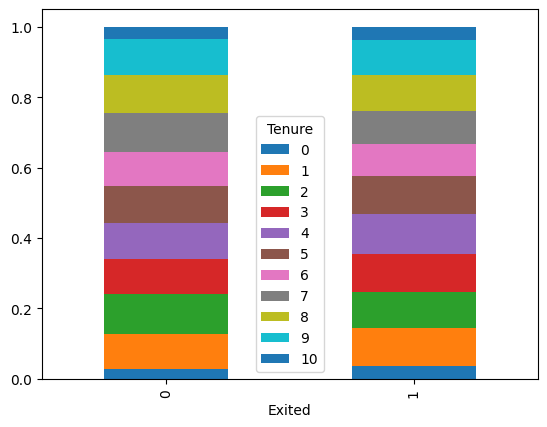

In [40]:
pd.crosstab(df_train["Exited"], df_train["Tenure"], normalize="index").plot(kind="bar", stacked=True)

## Analyse de la variable "NumOfProducts" avec "Exited"

- Les clients possédant 1 produit ont tendance à plus résilié
- Les clients avec 3 et 4 produits résilient majoritairement
- Les clients avec 2 produits sont les plus fidèles

In [35]:
pd.crosstab(df_train["Exited"], df_train["NumOfProducts"])

NumOfProducts,1,2,3,4
Exited,,,,
0,43905,68879,292,53
1,23459,4422,2218,351


Text(0.5, 0.98, 'Répartition du nbr de produits souscrit par les clients ayant résilié 1=oui, 0=non dans ce jeu de donnée')

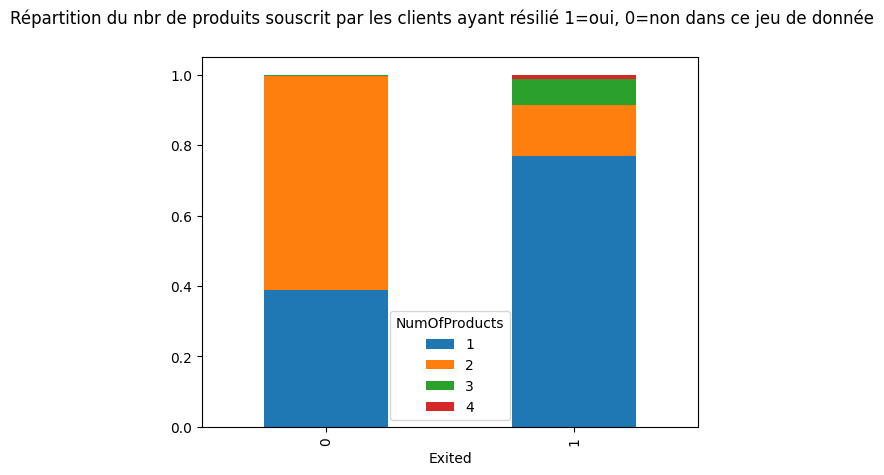

In [10]:
pd.crosstab(df_train["Exited"], df_train["NumOfProducts"], normalize="index").plot(kind="bar", stacked=True)
plt.suptitle("Répartition du nbr de produits souscrit par les clients ayant résilié 1=oui, 0=non dans ce jeu de donnée")

## Analyse de la variable "Geography" avec "Exited"

- L'allamagne semble avoir le plus haut taux de résiliation comparer à la France et l'espagne
 

In [32]:
pd.crosstab(df_train["Exited"], df_train["Geography"], normalize=True)

Geography,France,Germany,Spain
Exited,,,
0,0.475961,0.129942,0.182018
1,0.094359,0.079733,0.037986


Text(0.5, 0.98, "Répartition géographique entre la France, l'allemagne et l'espagne\n des clients ayant résilié 1=oui, 0=non dans ce jeu de donnée")

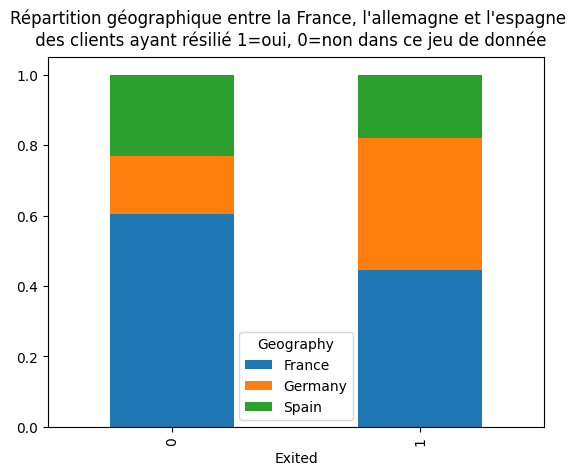

In [12]:
pd.crosstab(df_train["Exited"], df_train["Geography"], normalize="index").plot(kind="bar", stacked=True)
plt.suptitle("Répartition géographique entre la France, l'allemagne et l'espagne\n des clients ayant résilié 1=oui, 0=non dans ce jeu de donnée")

## Analyse de la variable "HasCrCard" avec "Exited"

- Il ne semble pas y avoir de corrélation sur la résiliation sur le fait qu'un client possède une carte de crédit ou non

In [44]:
pd.crosstab(df_train["Exited"], df_train["HasCrCard"])

HasCrCard,0.0,1.0
Exited,,
0,27246,85883
1,8059,22391


Text(0.5, 0.98, 'Répartition des clients ayant résilié 1=oui, 0=non \npossedant une carte de crédit 1=oui, 0=non dans ce jeu de donnée')

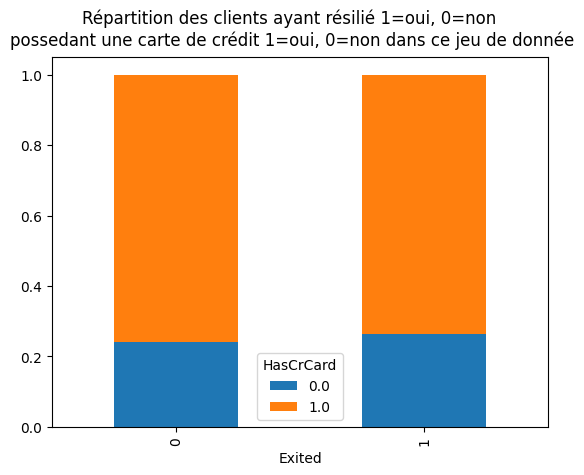

In [13]:
pd.crosstab(df_train["Exited"], df_train["HasCrCard"], normalize="index").plot(kind="bar", stacked=True)
plt.suptitle("Répartition des clients ayant résilié 1=oui, 0=non \npossedant une carte de crédit 1=oui, 0=non dans ce jeu de donnée")

## Analyse de la variable "IsActiveMember" avec "Exited"

- Les clients inactifs ont plus tendance à résilier

In [23]:
pd.crosstab(df_train["Exited"], df_train["IsActiveMember"])

IsActiveMember,0.0,1.0
Exited,,
0,50742,62387
1,21507,8943


Text(0.5, 0.98, 'Répartition des clients ayant résilié 1=oui, 0=non \ndans ce jeu de donnée étant actif 1=oui, 0=non')

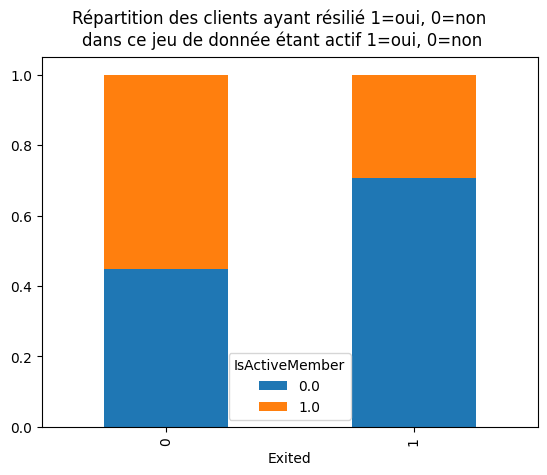

In [15]:
pd.crosstab(df_train["Exited"], df_train["IsActiveMember"], normalize="index").plot(kind="bar", stacked=True)
plt.suptitle("Répartition des clients ayant résilié 1=oui, 0=non \ndans ce jeu de donnée étant actif 1=oui, 0=non")

continue - discrète

## Analyse de la variable "CreditScore" avec "Exited"

- Le Score de crédit n'influence pas les clients à résilier

Text(0.5, 0.98, 'Moyenne de la variable CreditScore des clients \nayant résilié 1=oui, 0=non dans ce jeu de donnée')

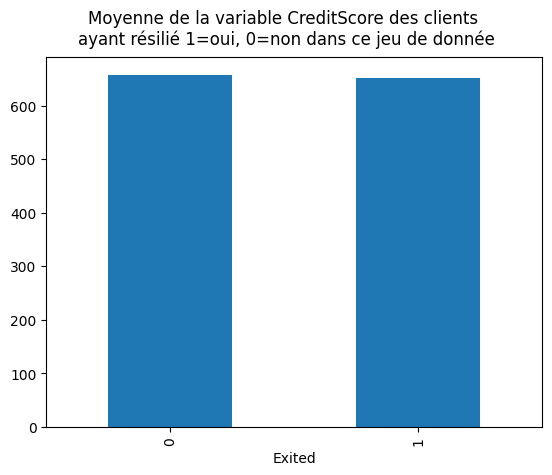

In [25]:
df_train.groupby("Exited")["CreditScore"].mean().plot(kind="bar")
plt.suptitle("Moyenne de la variable CreditScore des clients \nayant résilié 1=oui, 0=non dans ce jeu de donnée")

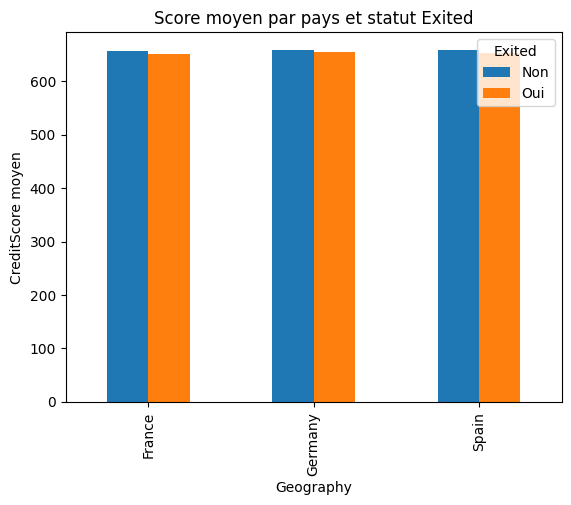

In [22]:
# Exemple : pays dans une colonne "Geography"
df_grouped = df_train.groupby(["Geography", "Exited"])["CreditScore"].mean().unstack()

# Tracé
df_grouped.plot(kind="bar")
plt.ylabel("CreditScore moyen")
plt.title("Score moyen par pays et statut Exited")
plt.legend(title="Exited", labels=["Non", "Oui"])
plt.show()


## Analyse de la variable "Balance" avec "Exited"

- Une balance de compte élevé à tendance à faire résilier les clients

Text(0.5, 0.98, 'Moyenne de la Balance des clients \nayant résilié 1=oui, 0=non dans ce jeu de donnée')

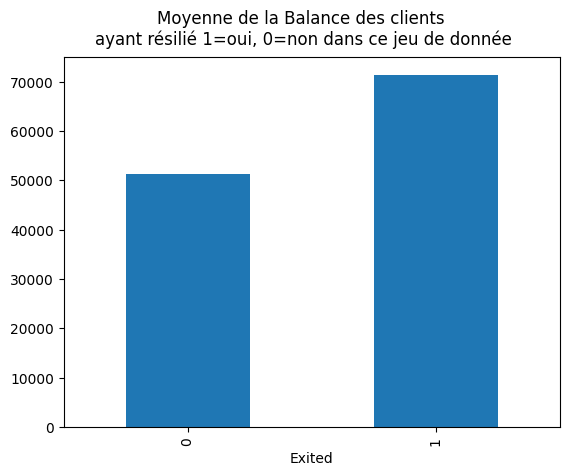

In [28]:
df_train.groupby("Exited")["Balance"].mean().plot(kind="bar")
plt.suptitle("Moyenne de la Balance des clients \nayant résilié 1=oui, 0=non dans ce jeu de donnée")   

## Analyse de la variable "EstimatedSalary" avec "Exited"

- Le salaire estimé ne semble pas corrélérer avec la résiliation

Text(0.5, 0.98, 'Moyenne de la variable EstimatedSalary des clients \nayant résilié 1=oui, 0=non dans ce jeu de donnée')

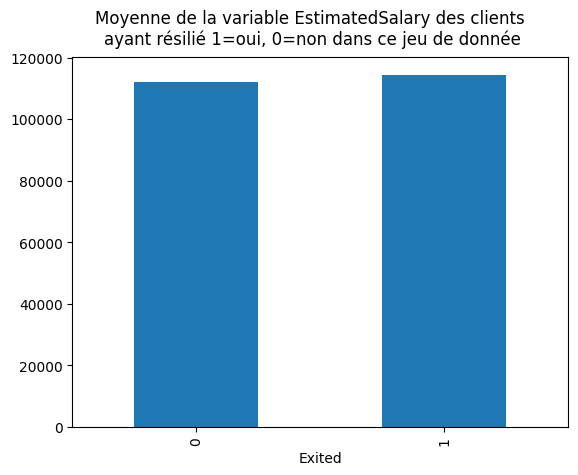

In [37]:
df_train.groupby("Exited")["EstimatedSalary"].mean().plot(kind="bar")
plt.suptitle("Moyenne de la variable EstimatedSalary des clients \nayant résilié 1=oui, 0=non dans ce jeu de donnée")

## Analyse de la variable "Age" avec "Exited"

- Les clients de plus de 44 ans ont plus tendance à résilier

In [33]:
df_train.groupby("Exited")["Age"].median()

Exited
0    36.0
1    44.0
Name: Age, dtype: float64

Text(0.5, 0.98, 'Médiane de la variable Age des clients \nayant résilié 1=oui, 0=non dans ce jeu de donnée')

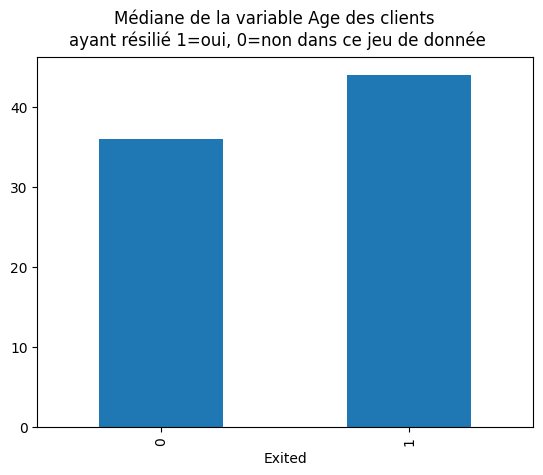

In [36]:
df_train.groupby("Exited")["Age"].median().plot(kind="bar")
plt.suptitle("Médiane de la variable Age des clients \nayant résilié 1=oui, 0=non dans ce jeu de donnée")

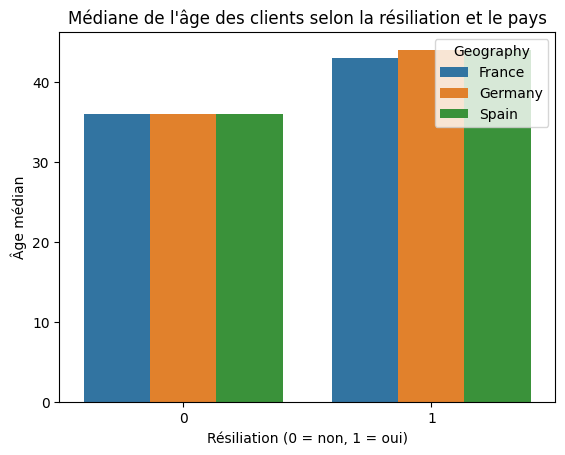

In [35]:
# Moyenne d'âge par pays et par statut de résiliation
grouped = df_train.groupby(["Geography", "Exited"])["Age"].median().reset_index()

# Affichage en barplot
sns.barplot(data=grouped, x="Exited", y="Age", hue="Geography")

plt.title("Médiane de l'âge des clients selon la résiliation et le pays")
plt.xlabel("Résiliation (0 = non, 1 = oui)")
plt.ylabel("Âge médian")
plt.show()

# En +

## 1. Y a-t-il une corrélation entre le CreditScore et Geography ?

- A priori non

In [40]:
df_train.groupby("Geography")["CreditScore"].mean()


Geography
France     655.943385
Germany    656.963694
Spain      657.099658
Name: CreditScore, dtype: float64

## 2. Corrélation entre Balance et Age et Geography?

- Les allemands n'ont que 0.32% de comptes à 0€ comparé à la France (69.19%) et L'Espagne (67%) dans ce jeu de donnée.

<Axes: xlabel='Age', ylabel='Balance'>

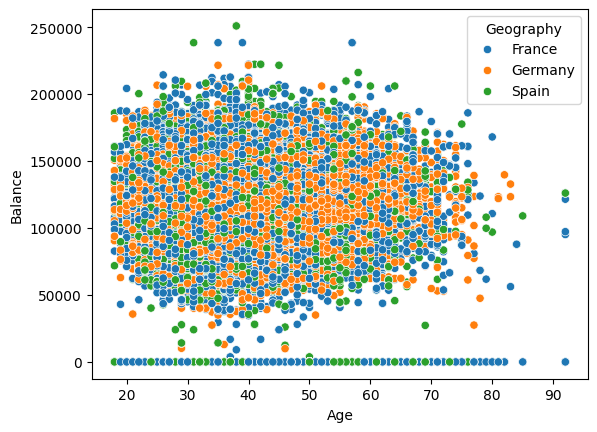

In [5]:
sns.scatterplot(data=df_train, x="Age", y="Balance", hue="Geography")


In [38]:
nbrClientAllemand = df_train.query("Geography == 'Germany'").shape[0]
nbrClientAllemandzeroB = df_train.query("Geography == 'Germany' and Balance == 0").shape[0]
tauxClientAllemandzeroB = ((nbrClientAllemandzeroB / nbrClientAllemand) * 100).__round__(2)

print(f"Sur {nbrClientAllemand} clients Allemands, {tauxClientAllemandzeroB}% ont un solde égal à 0")

Sur 30105 clients Allemands, 0.32% ont un solde égal à 0


In [39]:
nbrClientAllemand = df_train.query("Geography == 'France'").shape[0]
nbrClientAllemandzeroB = df_train.query("Geography == 'France' and Balance == 0").shape[0]
tauxClientAllemandzeroB = ((nbrClientAllemandzeroB / nbrClientAllemand) * 100).__round__(2)

print(f"Sur {nbrClientAllemand} clients Français, {tauxClientAllemandzeroB}% ont un solde égal à 0")

Sur 81886 clients Français, 69.19% ont un solde égal à 0


In [40]:
nbrClientAllemand = df_train.query("Geography == 'Spain'").shape[0]
nbrClientAllemandzeroB = df_train.query("Geography == 'Spain' and Balance == 0").shape[0]
tauxClientAllemandzeroB = ((nbrClientAllemandzeroB / nbrClientAllemand) * 100).__round__(2)

print(f"Sur {nbrClientAllemand} clients Espagnol, {tauxClientAllemandzeroB}% ont un solde égal à 0")

Sur 31588 clients Espagnol, 67.0% ont un solde égal à 0


In [46]:
df_train.query("Balance == 0").groupby("Geography")["Balance"].count()

Geography
France     56659
Germany       95
Spain      21164
Name: Balance, dtype: int64

<Axes: xlabel='Geography'>

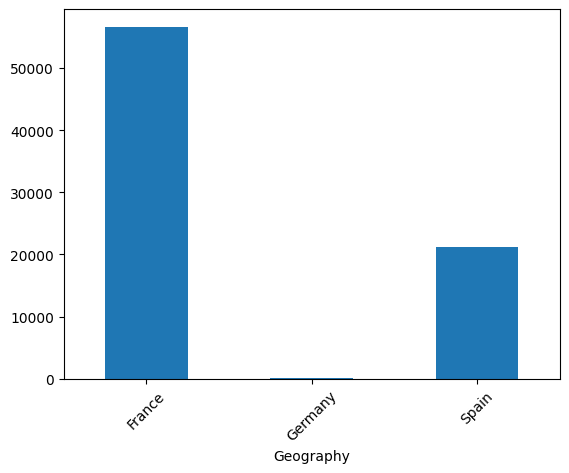

In [47]:
df_train.query("Balance == 0").groupby("Geography")["Balance"].count().plot(kind="bar", rot=45)


## 3. Corrélation entre l'ancienneté et l'âge

-L'âge n'est pas corrélé à l'ancienneté (Tenure) dans ce dataset.

In [56]:
df_train.groupby("Tenure")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Tenure,,,,,,,,
0,4346.0,38.557294,9.005921,18.0,32.0,37.0,43.0,92.0
1,14603.0,38.472467,9.125987,18.0,32.0,37.0,43.0,92.0
2,15766.0,38.003806,8.737072,18.0,32.0,37.0,42.0,82.0
3,14484.0,38.214789,8.965872,18.0,32.0,37.0,43.0,92.0
4,15257.0,38.168120,8.806281,18.0,32.0,37.0,43.0,82.0
5,14984.0,38.257475,8.984538,18.0,32.0,37.0,43.0,81.0
6,13716.0,38.075241,8.825453,18.0,32.0,37.0,42.0,92.0
7,15474.0,37.790617,8.724207,18.0,32.0,37.0,42.0,84.0
8,15272.0,38.001594,8.739172,18.0,32.0,37.0,42.0,84.0


In [57]:
df_train[["Age", "Tenure"]].corr()


,Age,Tenure
Age,1.000000,-0.010471
Tenure,-0.010471,1.000000


<Axes: xlabel='Tenure', ylabel='Age'>

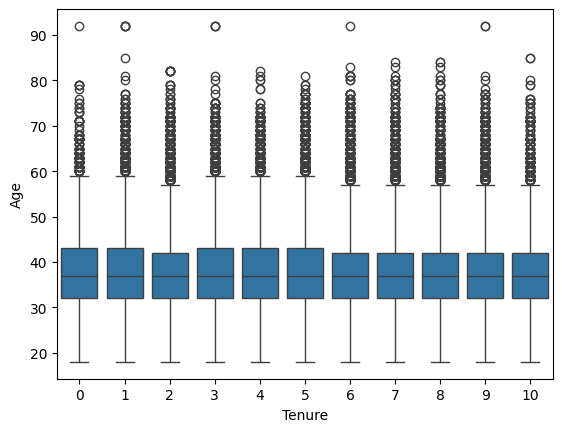

In [44]:
sns.boxplot(x="Tenure", y="Age", data=df_train)

## 4. Y a-t-il une corrélation avec la variable "Geography" et "IsActiveMember"

- L'allemagne semble avoir plus de membre inactif que la France et l'Espagne
- France 50.4% de client actif
- Allemagne 46% de client actif
- Espagne 51.1% de client actif

In [61]:
pd.crosstab(df_train["Geography"], df_train["IsActiveMember"], normalize="index")


IsActiveMember,0.0,1.0
Geography,,
France,0.495591,0.504409
Germany,0.539379,0.460621
Spain,0.488445,0.511555


<Axes: xlabel='Geography'>

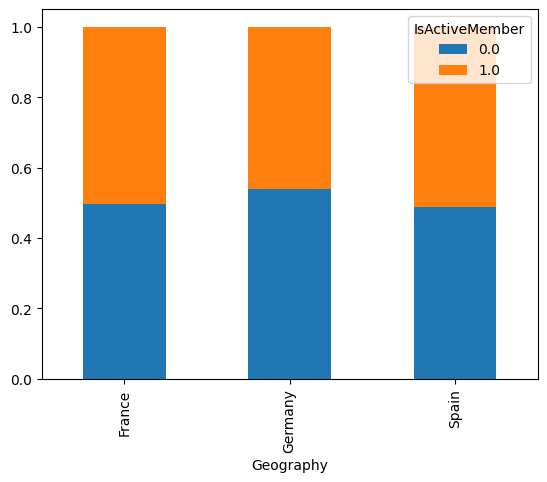

In [60]:
pd.crosstab(df_train["Geography"], df_train["IsActiveMember"], normalize="index").plot(kind="bar", stacked=True)

## 5. Y a-t-il une corrélation avec la variable "Geography" et "NumOfProducts"

- Les clients allemands ayant 1 produit sont plus nombreux qu'en France et Espagne
- Le nombre de clients possédant 1 ou 2 produits est équitable entre la France et l'Espagne
- Se sont les clients Allemands qui ont le plus 3 et 4 produits aussi

In [48]:
df_train.groupby("Geography")["NumOfProducts"].value_counts(normalize=True).unstack()


NumOfProducts,1,2,3,4
Geography,,,,
France,0.433713,0.550668,0.013580,0.002039
Germany,0.595250,0.370337,0.028700,0.005713
Spain,0.440959,0.540079,0.016905,0.002058


<Axes: xlabel='Geography'>

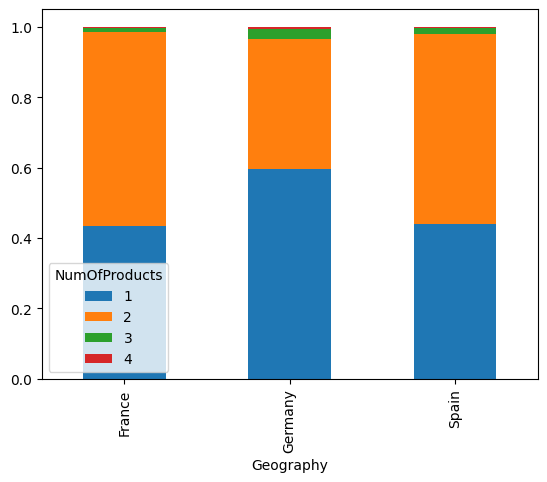

In [52]:
pd.crosstab(df_train["Geography"], df_train["NumOfProducts"], normalize="index").plot(kind="bar", stacked=True)

## 6. Y a-t-il une corrélation avec la variable "Geography" et "Age"

- Les clients allemands ont une médiane de 39 ans
- Les clients Français et Espagnol ont une médiane de 37 ans
- L'age mini pour l'Allemagne, la France et l'Espagne est de 18 ans
- L'age maxi pour l'allemagne est de 83 ans
- l'age maxi pour la France et l'Espagne est de 92 ans

- Il est interressant de noté que les clients allemands les plus agés ont 9 ans de moins que ceux de l'Espagne et la France<br> mais que la moyenne d'age des clients est d'environ 2 ans plus élevé que les clients Français et Espagnol 

In [54]:
df_train.groupby("Geography")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Geography,,,,,,,,
France,81886.0,37.627170,8.672968,18.0,32.0,37.0,41.0,92.0
Germany,30105.0,39.755223,9.149116,18.0,33.0,39.0,45.0,83.0
Spain,31588.0,37.950372,8.932131,18.0,32.0,37.0,42.0,92.0


<Axes: xlabel='Geography'>

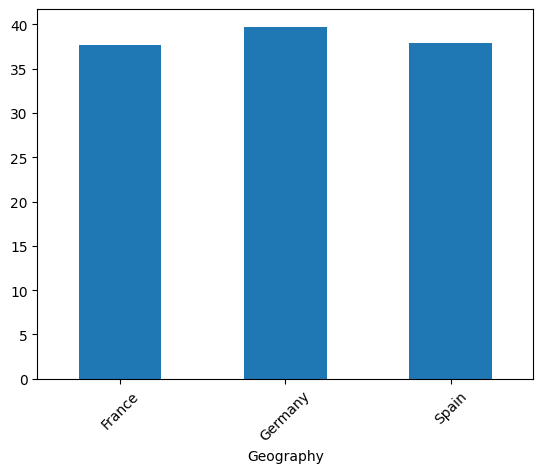

In [4]:
df_train.groupby("Geography")["Age"].mean().plot(kind="bar", rot=45)

## 7. Y a-t-il une corrélation avec la variable "Geography" et "Balance"

- Le solde moyen des clients allemands est de 121 234 € avec une médiane à 122 021 €
- Le solde moyen des clients Français est de 37 376 € avec une médiane à 0 €
- Le solde moyen des clients Espagnols est de 39 986 € avec une médiane à 0 €

In [10]:
df_train.groupby("Geography")["Balance"].describe()


,count,mean,std,min,25%,50%,75%,max
Geography,,,,,,,,
France,81886.0,37376.680784,57993.838054,0.0,0.00,0.00,96863.13,238387.56
Germany,30105.0,121234.034208,23223.945119,0.0,106970.61,122021.92,135776.36,250898.09
Spain,31588.0,39986.295655,59129.245732,0.0,0.00,0.00,101854.19,250898.09


<Axes: xlabel='Geography'>

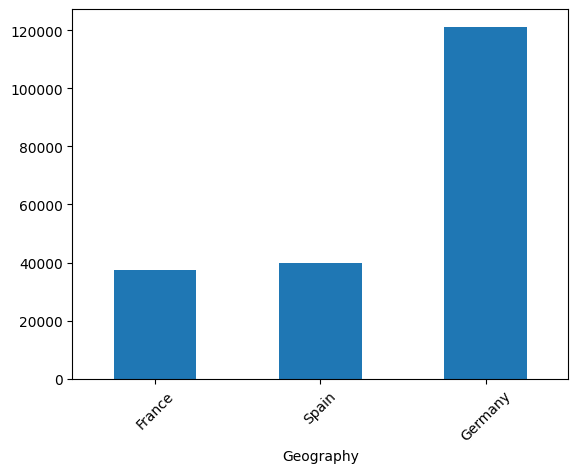

In [7]:
df_train.groupby("Geography")["Balance"].mean().sort_values().plot(kind="bar", rot=45)

## 8. Y a-t-il une corrélation avec la variable "IsActiveMember" et "Balance"

- Il y a autant de compte actif que inactif pour les clients ayant un solde égal ou supérieur à 0€
- Les comptes actifs avec un solde supérieur à 0€ ont plus tendances à résilier que ceux ayant un solde égal à 0€

In [51]:
df_train.query("Balance == 0")["IsActiveMember"].value_counts(normalize=True)


IsActiveMember
1.0    0.50326
0.0    0.49674
Name: proportion, dtype: float64

In [19]:
pd.crosstab(df_train.query("Balance == 0")["Geography"], df_train["IsActiveMember"], normalize=True)

IsActiveMember,0.0,1.0
Geography,,
France,0.362099,0.365063
Germany,0.000680,0.000539
Spain,0.133961,0.137658


<Axes: xlabel='Geography'>

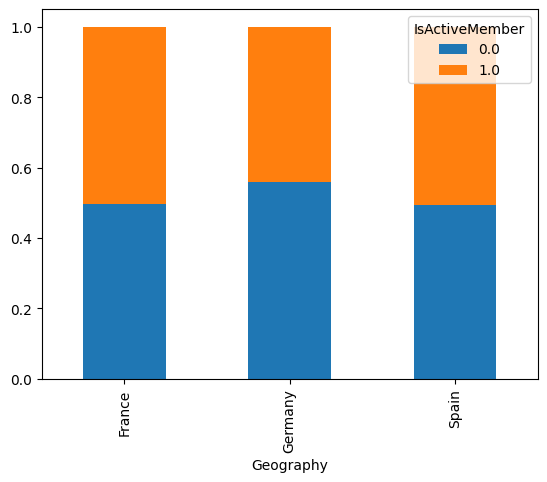

In [18]:
pd.crosstab(df_train.query("Balance == 0")["Geography"], df_train["IsActiveMember"], normalize="index").plot(kind="bar", stacked=True)

In [21]:
pd.crosstab(df_train.query("Balance > 0")["Geography"], df_train["IsActiveMember"], normalize=True)


IsActiveMember,0.0,1.0
Geography,,
France,0.188361,0.195839
Germany,0.246493,0.210551
Spain,0.076012,0.082743


<Axes: xlabel='Geography'>

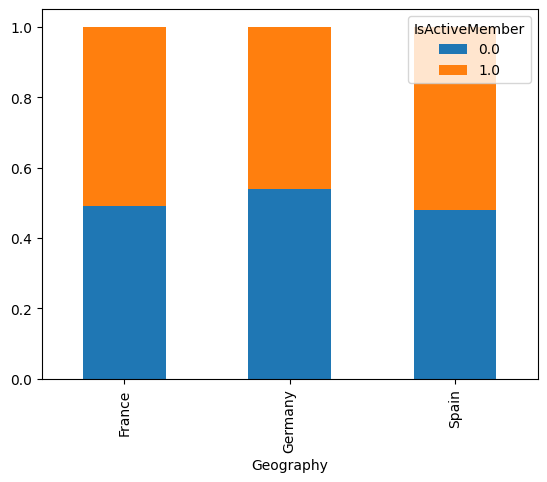

In [22]:
pd.crosstab(df_train.query("Balance > 0")["Geography"], df_train["IsActiveMember"], normalize="index").plot(kind="bar", stacked=True)

In [53]:
df_train.query("Balance == 0")["Exited"].value_counts(normalize=True)


Exited
0    0.838394
1    0.161606
Name: proportion, dtype: float64

In [54]:
df_train.query("Balance > 0")["Exited"].value_counts(normalize=True)


Exited
0    0.728027
1    0.271973
Name: proportion, dtype: float64

## Gender vs Age

- Les hommes et les femmes ont le même age moyen à 1 an prêt.

In [8]:
df_train.groupby("Gender")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,62613.0,38.790911,9.121629,18.0,33.0,38.0,44.0,92.0
Male,80966.0,37.644572,8.640465,18.0,32.0,37.0,41.0,92.0


<Axes: xlabel='Gender'>

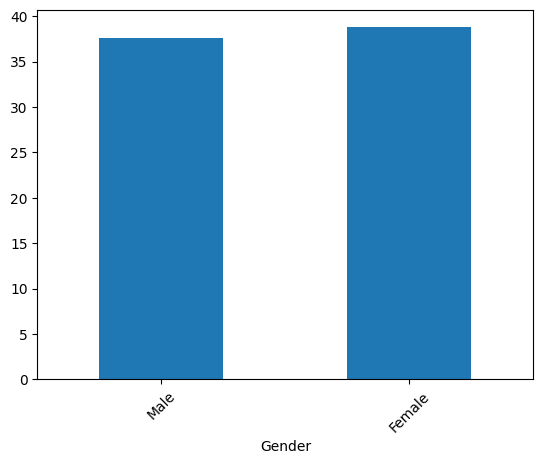

In [7]:
df_train.groupby("Gender")["Age"].mean().sort_values().plot(kind="bar", rot=45)

## Gender vs NumOfProducts

Parmi les femmes :
- 49,1 % ont 1 produit
- 48,3 % ont 2 produits
- 2,2 % ont 3 produits
- 0,4 % ont 4 produits

Parmi les hommes :
- 45,2 % ont 1 produit
- 53,2 % ont 2 produits
- 1,4 % ont 3 produits
- 0,2 % ont 4 produits

In [21]:
pd.crosstab(df_train["Gender"], df_train["NumOfProducts"], normalize="index")

NumOfProducts,1,2,3,4
Gender,,,,
Female,0.491320,0.482568,0.022328,0.003785
Male,0.452054,0.532149,0.013734,0.002063


<Axes: xlabel='Gender'>

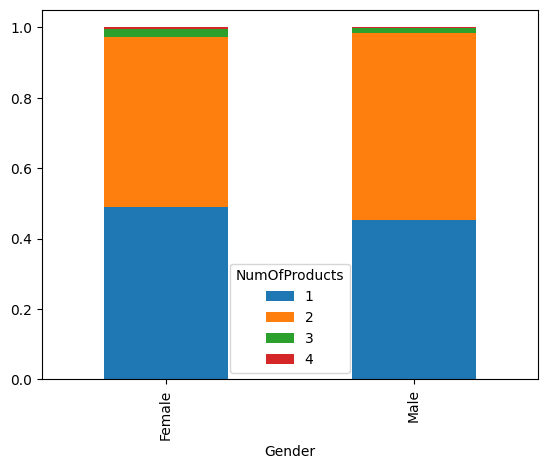

In [20]:
pd.crosstab(df_train["Gender"], df_train["NumOfProducts"], normalize="index").plot(kind="bar", stacked=True)